In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/CHARLIE/Desktop/cardio/cardio_train.csv", sep = ';', index_col='id')
df.index.name = None
df

## 資料說明
===

###  特徵：
1. 年齡
2. 身高
3. 重量
4. 性別 (1: 女；2: 男)
5. 收縮壓
6. 舒張壓
7. 膽固醇 (1：正常；2：高於正常；3：遠高於正常)
8. 葡萄糖 (1：正常；2：高於正常；3：遠高於正常)
9. 吸煙
10. 酒精攝取
11. 體力活動
12. 是否存在心血管疾病 (0: 否；1: 是)

## 資料處理/EDA
===

In [4]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

轉換資料

In [5]:
df['age'] = df['age'] // 365
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76.0,120,80,1,1,1,0,1,0
99995,61,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1
99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df['BMI'] = round(df['weight'] / (((df['height']) / 100)**2), 2)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93
99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.47
99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35
99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  BMI          70000 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


In [8]:
df_copy = df.copy()

In [9]:
df_copy['cholesterol'] = df_copy['cholesterol'].astype(str)
df_copy['gluc'] = df_copy['gluc'].astype(str)
df_copy['smoke'] = df_copy['smoke'].astype(str)
df_copy['alco'] = df_copy['alco'].astype(str)
df_copy['active'] = df_copy['active'].astype(str)
df_copy['cardio'] = df_copy['cardio'].astype(str)
def gender_convert(x):
    if x == 1:
        return 'Female'
    else:
        return 'Male'
df_copy['gender'] = df_copy['gender'].apply(gender_convert)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
 12  BMI          70000 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 7.5+ MB


In [10]:
df_copy.describe(include='all')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000,70000.000000,70000.000000,70000.000000,70000.000000,70000,70000,70000,70000,70000,70000,70000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2,2,2,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,1,1,0,0,1,0,NaN
freq,NaN,45530,NaN,NaN,NaN,NaN,52385,59479,63831,66236,56261,35021,NaN
mean,52.840671,NaN,164.359229,74.205690,128.817286,96.630414,NaN,NaN,NaN,NaN,NaN,NaN,27.556545
std,6.766774,NaN,8.210126,14.395757,154.011419,188.472530,NaN,NaN,NaN,NaN,NaN,NaN,6.091405
min,29.000000,NaN,55.000000,10.000000,-150.000000,-70.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.470000
25%,48.000000,NaN,159.000000,65.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,23.880000
50%,53.000000,NaN,165.000000,72.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.375000
75%,58.000000,NaN,170.000000,82.000000,140.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.220000


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 相關係數熱力圖

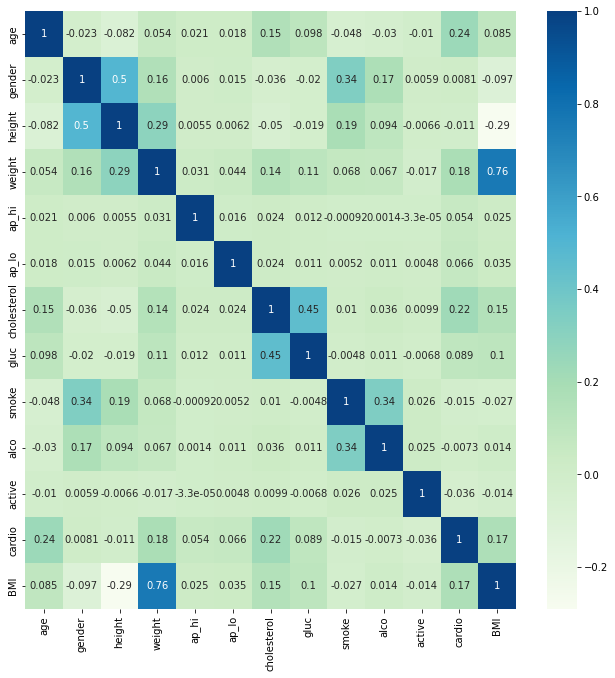

In [12]:
plt.figure(figsize = (11, 11))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.savefig('C:/Users/CHARLIE/Desktop/cardio/corrheatmap.png', bbox_inches='tight')
plt.show()

#### GENDER / CARDIO

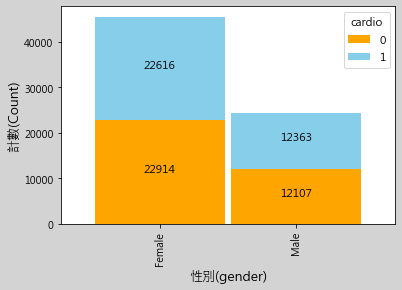

In [30]:
# 設置中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 負號'-'顯示為方塊
plt.rcParams.update({'font.size': 11})  # 全局字體大小設置
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['gender', 'cardio']).size().unstack(fill_value = 0)

# sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False)
sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count



# plt.title('')
plt.xlabel('性別(gender)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/stacked_bar_chart.png', bbox_inches='tight')  # 指定保存的文件名和格式，bbox_inches='tight'用於避免裁切圖片邊緣
# 顯示圖表
plt.show()


#### CHOLESTEROL / CARDIO

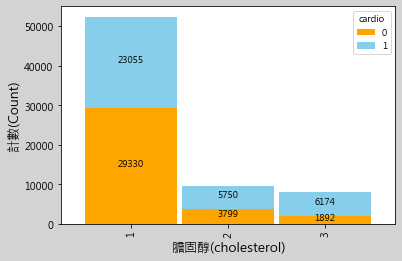

In [13]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 9})
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['cholesterol', 'cardio']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('膽固醇(cholesterol)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/chole&cardio.png', bbox_inches='tight')

plt.show()


#### GLUC / CARDIO

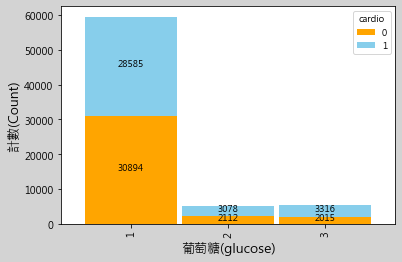

In [40]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 9})
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['gluc', 'cardio']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('葡萄糖(glucose)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/gluc&cardio.png', bbox_inches='tight')

plt.show()


#### SMOKE / CARDIO

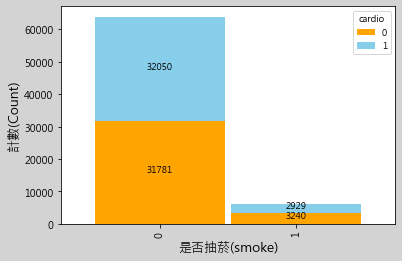

In [41]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 9})
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['smoke', 'cardio']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('是否抽菸(smoke)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/smoke&cardio.png', bbox_inches='tight')

plt.show()


#### ALCO / CARDIO

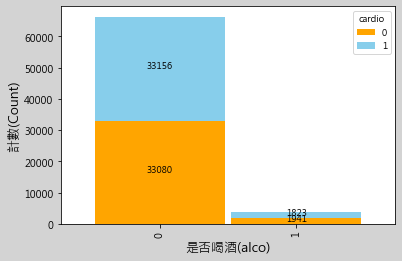

In [43]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 9})
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['alco', 'cardio']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('是否喝酒(alco)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/alco&cardio.png', bbox_inches='tight')

plt.show()


#### ACTIVE / CARDIO

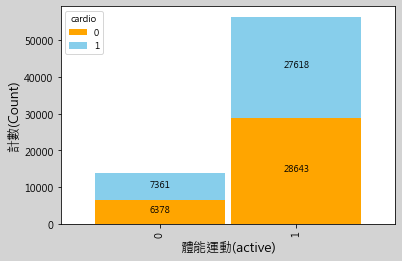

In [45]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 9})
fig = plt.figure(facecolor='lightgrey')

counts = df_copy.groupby(['active', 'cardio']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['orange', 'skyblue']))
counts.plot(kind='bar', stacked = True, width = 0.95, ax=fig.add_subplot(111))


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('體能運動(active)', fontsize = 13)
plt.ylabel('計數(Count)', fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('C:/Users/CHARLIE/Desktop/cardio/active&cardio.png', bbox_inches='tight')

plt.show()


#### 年齡直方圖

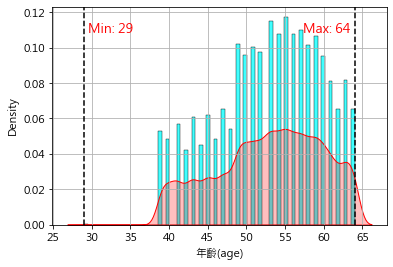

In [14]:
plt.rcParams.update({'font.size': 11})

min_value = np.min(df_copy['age'])
max_value = np.max(df_copy['age'])

sns.histplot(df_copy['age'], stat = 'density', kde = False, color = 'Cyan')
sns.kdeplot(df['age'], fill = True, color = 'red')
plt.xlabel('年齡(age)')

plt.axvline(x = min_value, color = 'black', linestyle = '--', linewidth = 1.5)  # 添加垂直线标示最小值
plt.axvline(x = max_value, color = 'black', linestyle = '--', linewidth = 1.5)  # 添加垂直线标示最大值

plt.text(min_value + 0.5, plt.ylim()[1]*0.88, f'Min: {min_value}', fontsize=13, color='red', ha='left')
plt.text(max_value - 0.5, plt.ylim()[1]*0.88, f'Max: {max_value}', fontsize=13, color='red', ha='right')

plt.grid(True)
plt.savefig('C:/Users/CHARLIE/Desktop/cardio/age_hist.png', bbox_inches='tight')
plt.show()

## 訓練模型

In [25]:
from sklearn.model_selection import  cross_val_score
from sklearn.experimental import enable_halving_search_cv
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
# from sklearn.base import clone

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics

In [21]:
X=df.drop(['cardio'], axis=1)
y=df['cardio']

#def f1_metric(model, X_train, y_train):
#        return f1_score(y_train, model.predict(X_train), average='binary')

# def plotFeatureimportance(model, X_train, y_train):
    # Call drop-column feature importance function
#    df_drop_column = Featureimportance(model, X_train, y_train, random_state=0)
    # Rename columns
#    df_drop_column.columns = ['Feature', 'Feature Importance']

    # Plot barchart
#    plt.figure(figsize=(12,10))
#    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h',
#                              color="white",
#                              hatch='//',
#                              edgecolor="darkred",
#                              ecolor="black",
#                              linewidth=0.6,)


#    plt.xlabel("Feature Importance", size=16)
#    plt.ylabel("Feature", size=16)
#    plt.title(' Feature Importance', fontsize=20)
#    plt.show()

In [22]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.35)
scaler= StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

StandardScaler()

[[9318 2956]
 [3924 8302]]
Accuracy: 71.92 %


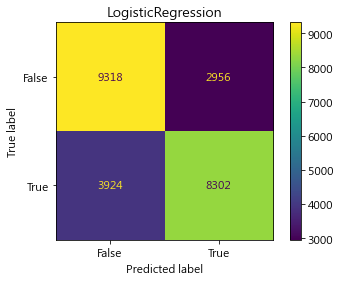

[0.71671429 0.71328571 0.72342857 0.72857143 0.717      0.72214286
 0.72428571 0.73028571 0.71842857 0.71585714]
Accuracy: 72.10 %
Standard Deviation: 0.54 %
Precision: 74.16 %
Recall: 67.78 %
F1: 70.83 %


In [40]:
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train_scaled, y_train.astype('int'))

y_pred_lr = model_lr.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, y_pred_lr.astype('int'))
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test.astype('int'), y_pred_lr.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("LogisticRegression")
plt.show()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv_accuracy_0 = cross_val_score(estimator = model_lr, X = scaler.fit_transform(X), y = y, cv = 10)
cv_precision_0 = cross_val_score(estimator = model_lr, X = scaler.fit_transform(X), y = y, cv = 10, scoring='precision')
cv_recall_0 = cross_val_score(estimator = model_lr, X = scaler.fit_transform(X), y = y, cv = 10, scoring='recall')
cv_f1_0 = cross_val_score(estimator = model_lr, X = scaler.fit_transform(X), y = y, cv = 10, scoring='f1')
print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_0.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_0.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_0.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_0.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_0.mean()*100))

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()


# class_weight:['balanced']
grid = {'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2', None], 
				'max_depth': [3, 6, 9, 12], 'min_samples_split': [3, 6, 9],'min_samples_leaf': [3, 6, 9], 'class_weight': ['balanced']}
# class_weight:

model_grid = HalvingGridSearchCV(model_rf, grid, factor=3, random_state=42, verbose=1,
                                         scoring='f1',return_train_score=True)
model_grid.fit(X_train_scaled,y_train)
print("tuned hpyerparameters :(best parameters) ", model_grid.best_params_)
print("f1 score :", model_grid.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 187
max_resources_: 45500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 324
n_resources: 187
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 1
n_candidates: 108
n_resources: 561
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 2
n_candidates: 36
n_resources: 1683
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 3
n_candidates: 12
n_resources: 5049
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 15147
Fitting 5 folds for each of 4 candidates, totalling 20 fits
tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 150}
f1 score : 0.7219179104867931


[[8784 3490]
 [3603 8623]]
Accuracy: 71.05 %


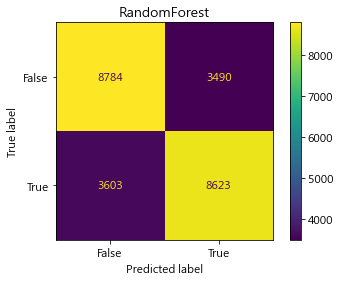

[0.71671429 0.71328571 0.72342857 0.72857143 0.717      0.72214286
 0.72428571 0.73028571 0.71842857 0.71585714]
Accuracy: 71.09 %
Standard Deviation: 0.68 %
Precision: 71.51 %
Recall: 70.24 %
F1: 70.82 %


In [41]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))
print(cm)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_rf.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("RandomForest")
plt.show()

cv_accuracy_1 = cross_val_score(estimator = model_rf, X = scaler.fit_transform(X), y = y, cv = 10)
cv_precision_1 = cross_val_score(estimator = model_rf, X = scaler.fit_transform(X), y = y, cv = 10, scoring='precision')
cv_recall_1 = cross_val_score(estimator = model_rf, X = scaler.fit_transform(X), y = y, cv = 10, scoring='recall')
cv_f1_1 = cross_val_score(estimator = model_rf, X = scaler.fit_transform(X), y = y, cv = 10, scoring='f1')
print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_1.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_1.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_1.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_1.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_1.mean()*100))

[[9528 2746]
 [3794 8432]]
Accuracy: 73.31 %


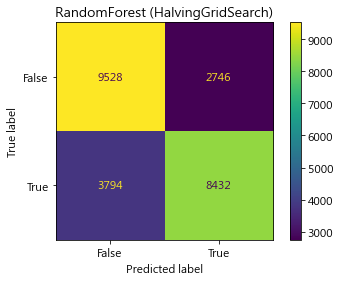

[0.71671429 0.71328571 0.72342857 0.72857143 0.717      0.72214286
 0.72428571 0.73028571 0.71842857 0.71585714]
Accuracy: 73.56 %
Standard Deviation: 0.39 %
Precision: 75.92 %
Recall: 69.13 %
F1: 72.40 %


In [42]:
model_grid = RandomForestClassifier(class_weight = 'balanced', max_depth = 12, max_features = 'log2', min_samples_leaf = 6, min_samples_split = 9, n_estimators = 150)
model_grid.fit(X_train_scaled, y_train)
y_pred_rf = model_grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))
print(cm)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_rf.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("RandomForest (HalvingGridSearch)")
plt.show()

cv_accuracy_2 = cross_val_score(estimator = model_grid, X = scaler.fit_transform(X), y = y, cv = 10)
cv_precision_2 = cross_val_score(estimator = model_grid, X = scaler.fit_transform(X), y = y, cv = 10, scoring='precision')
cv_recall_2 = cross_val_score(estimator = model_grid, X = scaler.fit_transform(X), y = y, cv = 10, scoring='recall')
cv_f1_2 = cross_val_score(estimator = model_grid, X = scaler.fit_transform(X), y = y, cv = 10, scoring='f1')
print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_2.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_2.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_2.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_2.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_2.mean()*100))

[[9528 2746]
 [3794 8432]]
Accuracy: 72.96 %


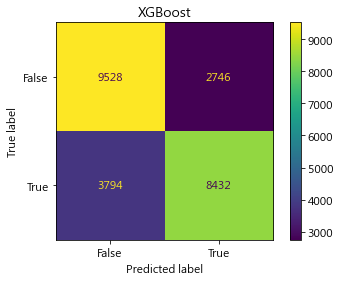

[0.71671429 0.71328571 0.72342857 0.72857143 0.717      0.72214286
 0.72428571 0.73028571 0.71842857 0.71585714]
Accuracy: 73.37 %
Standard Deviation: 0.49 %
Precision: 75.24 %
Recall: 69.61 %
F1: 72.31 %


In [43]:
from xgboost import XGBClassifier

model_xg = XGBClassifier()
model_xg.fit(X_train_scaled, y_train)
y_pred_xg = model_xg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))
print(cm)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_xg.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("XGBoost")
plt.show()

cv_accuracy_3 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10)
cv_precision_3 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='precision')
cv_recall_3 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='recall')
cv_f1_3 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='f1')
print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_3.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_3.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_3.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_3.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_3.mean()*100))

In [37]:
grid = {'eta': [0.01, 0.05, 0.1, 0.2], 'max_depth': [3, 6, 9, 12], 'subsample': [0, 0.5, 1],'colsample_bytree': [0, 0.5, 1], 'learning_rate': [0.1, 0.3, 0.5]}

model_grid = HalvingGridSearchCV(model_xg, grid, factor=3, random_state=42, verbose=1,
                                         scoring='f1',return_train_score=True)
model_grid.fit(X_train_scaled,y_train)
print("tuned hpyerparameters :(best parameters) ", model_grid.best_params_)
print("f1 score :", model_grid.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 187
max_resources_: 45500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 187
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
----------
iter: 1
n_candidates: 144
n_resources: 561
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 2
n_candidates: 48
n_resources: 1683
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 3
n_candidates: 16
n_resources: 5049
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 4
n_candidates: 6
n_resources: 15147
Fitting 5 folds for each of 6 candidates, totalling 30 fits
tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.5, 'eta': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
f1 score : 0.7222758897033126


[[9528 2746]
 [3794 8432]]
Accuracy: 73.49 %


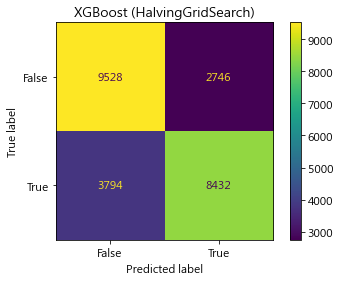

[0.71671429 0.71328571 0.72342857 0.72857143 0.717      0.72214286
 0.72428571 0.73028571 0.71842857 0.71585714]
Accuracy: 73.59 %
Standard Deviation: 0.50 %
Precision: 75.95 %
Recall: 68.99 %
F1: 72.30 %


In [44]:
model_xg = XGBClassifier(colsample_bytree = 0.5, eta = 0.1, learning_rate = 0.1, max_depth = 3, subsample = 0.5)
model_xg.fit(X_train_scaled, y_train)
y_pred_xg = model_xg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))
print(cm)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_xg.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("XGBoost (HalvingGridSearch)")
plt.show()

cv_accuracy_4 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10)
cv_precision_4 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='precision')
cv_recall_4 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='recall')
cv_f1_4 = cross_val_score(estimator = model_xg, X = scaler.fit_transform(X), y = y, cv = 10, scoring='f1')
print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_4.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_4.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_4.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_4.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_4.mean()*100))

In [50]:
pd.set_option('display.float_format', '{:.3f}'.format)

df_x = pd.DataFrame({
    'LogisticRegression': [cv_accuracy_0.mean(), cv_precision_0.mean(), cv_recall_0.mean(), cv_f1_0.mean()], 
    'RandomForest': [cv_accuracy_1.mean(), cv_precision_1.mean(), cv_recall_1.mean(), cv_f1_1.mean()], 
    'RandomForest (HalvingGridSearch)': [cv_accuracy_2.mean(), cv_precision_2.mean(), cv_recall_2.mean(), cv_f1_2.mean()], 
    'XGBoost': [cv_accuracy_3.mean(), cv_precision_3.mean(), cv_recall_3.mean(), cv_f1_3.mean()], 
    'XGBoost (HalvingGridSearch)': [cv_accuracy_4.mean(), cv_precision_4.mean(), cv_recall_4.mean(), cv_f1_4.mean()]}, index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
df_x

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.721,0.742,0.678,0.708
RandomForest,0.711,0.715,0.702,0.708
RandomForest (HalvingGridSearch),0.736,0.759,0.691,0.724
XGBoost,0.734,0.752,0.696,0.723
XGBoost (HalvingGridSearch),0.736,0.760,0.690,0.723


In [54]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

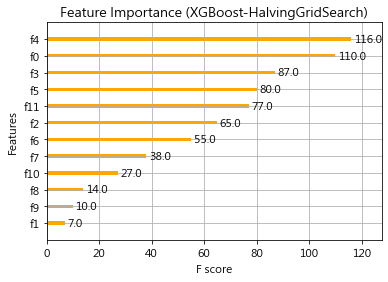

In [60]:
import xgboost

model_xg.feature_names = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'BMI']
xgboost.plot_importance(model_xg, importance_type='weight', title = 'Feature Importance (XGBoost-HalvingGridSearch)')
plt.show()